625 Project Report
Yixuan Cheng

# Exploratory Data Analysis and Salary Prediction on data-related job

# Introduction

Data science has been called “the sexiest job of the 21st century”. As an information science student, I regarded data science related work as my future career option and have paid constant attention to the job market. 
There are people being optimistic about the field, while others warn that this area has been overweight. Thus, I hope this research could be helpful for understanding the demand situation of data-related job in current job market. In the meanwhile, I hope to solve a few problems that I face when looking for jobs. When I look at the job posting platform, I notice that the requirements for data scientists are different from companies to companies, and even constantly changing in the job market. It also troubles me when I notice that different companies have their own way to call a position. Thus, I hope to explore more about the data science job market and provide hits for students who are finding data science related jobs. 

# Related Work

There are many projects in this area, but they all utilize data in a period. The methods used include exploratory data analysis, text analysis and natural language processing.
PwC has a thorough report “Investing in America’s data science and analytics talent” that examines data science and analytics workforce trends. The report provides insights into the existing job market for employers and employees.
A report “A Text Analysis of Data-Science Career Opportunities and US iSchool Curriculum” did research on data-science professional roles. The goal was to understand whether iSchool course learning objectives align with professional data-science needs. 
A report called “A Data Science Approach to Defining a Data Scientist” from SMU Data Science Review listed skills for a data scientist from online job postings and clarified the overlap and ambiguity of various roles. 

# Dataset

In [426]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

business_analyst = pd.read_csv('C:\\Users\\Chloe\\Desktop\\data-related job\\BusinessAnalyst.csv')
data_analyst = pd.read_csv('C:\\Users\\Chloe\\Desktop\\data-related job\\DataAnalyst.csv')
data_scientist = pd.read_csv('C:\\Users\\Chloe\\Desktop\\data-related job\\DataScientist.csv')
data_engineer = pd.read_csv('C:\\Users\\Chloe\\Desktop\\data-related job\\DataEngineer.csv')

The datasets that I used is from https://github.com/picklesueat/data_jobs_data. The dataset contains information for business analyst, data analyst, data engineer and data scientist jobs in a time in 2020 that has been posting on Glassdoor. For a particular line, it represents a data-related job posting. It contains information about job title, salary, job description, company name, location, company scope, company types, industry and headquarter...

In [427]:
data_analyst.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


Here is the job number for each job title, from which we can conclude that data analyst are the most needed job one time in 2020.

In [428]:
print('Business analyst:',len(business_analyst))
print('Data analyst:',len(data_analyst))
print('Data scientist:',len(data_scientist))
print('Data engineer:',len(data_engineer))

Business analyst: 4092
Data analyst: 5631
Data scientist: 3909
Data engineer: 2528


# Exploratory Data Analysis 

In this section, I explore topics on:
    1.Top 15 companies that offer data-related jobs
    2.Size of the companies that post data-related jobs¶
    3.Distribution of jobs in different industries
    4.Salary level for data-related jobs
    5.Various features that influence salary level
    5.Skillsets for different data-related jobs
    6.The distribution map of data-related jobs in the U.S.

### Top 15 companies offer data-related jobs

I will start my analysis with the top 15 companies that offer data-related job position. It will give us a overview of the job market and call our attention to those companies.

Text(0.5, 0, '# OF JOBS')

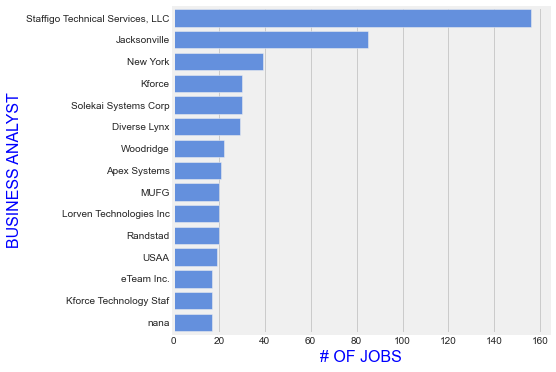

In [429]:
top = business_analyst.groupby(['Company Name'])['Job Title'].count()  
top = top.reset_index(name='Job Title')
top = top.sort_values(['Job Title'],ascending=False)
top = top.head(16)

top['Company'] = top['Company Name'].apply(lambda x: x[:-4])
top = top.drop(top.index[[6]])

# Plot graph for top 
fig, ax = plt.subplots(figsize = (6,6))
ax=sns.barplot(y="Company", x="Job Title", data=top, palette=['#508AF1'])    
ax.set_ylabel('BUSINESS ANALYST',fontsize=16, color='b')
ax.set_xlabel('# OF JOBS',fontsize=16,color='b') 

Text(0.5, 0, '# OF JOBS')

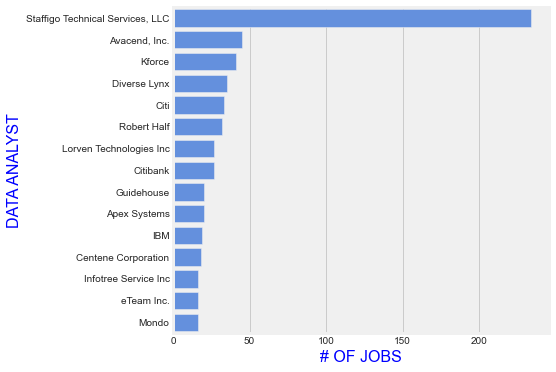

In [430]:
top = data_analyst.groupby(['Company Name'])['Job Title'].count()  
top = top.reset_index(name='Job Title')
top = top.sort_values(['Job Title'],ascending=False)
top = top.head(16)

top['Company'] = top['Company Name'].apply(lambda x: x[:-4])
top = top.drop(top.index[[6]])

# Plot graph for top 
fig, ax = plt.subplots(figsize = (6,6))
ax=sns.barplot(y="Company", x="Job Title", data=top, palette=['#508AF1'])    
ax.set_ylabel('DATA ANALYST',fontsize=16, color='b')
ax.set_xlabel('# OF JOBS',fontsize=16,color='b') 

Text(0.5, 0, '# OF JOBS')

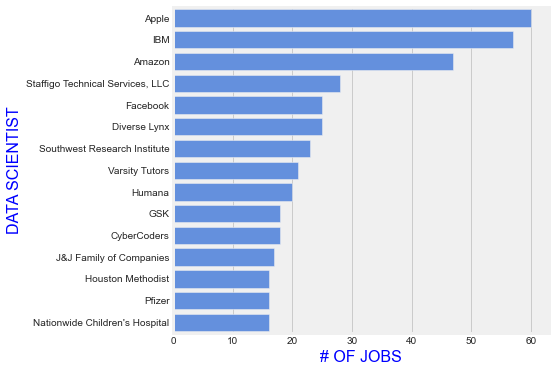

In [431]:
top = data_scientist.groupby(['Company Name'])['Job Title'].count()  
top = top.reset_index(name='Job Title')
top = top.sort_values(['Job Title'],ascending=False)
top = top.head(16)

top['Company'] = top['Company Name'].apply(lambda x: x[:-4])
top = top.drop(top.index[[6]])

# Plot graph for top 
fig, ax = plt.subplots(figsize = (6,6))
ax=sns.barplot(y="Company", x="Job Title", data=top, palette=['#508AF1'])    
ax.set_ylabel('DATA SCIENTIST',fontsize=16, color='b')
ax.set_xlabel('# OF JOBS',fontsize=16,color='b') 

Text(0.5, 0, '# OF JOBS')

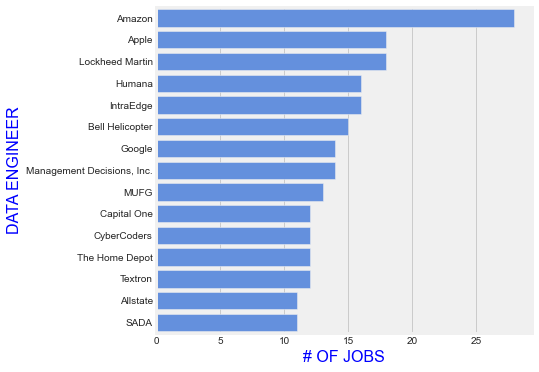

In [432]:
top = data_engineer.groupby(['Company Name'])['Job Title'].count()  
top = top.reset_index(name='Job Title')
top = top.sort_values(['Job Title'],ascending=False)
top = top.head(16)

top['Company'] = top['Company Name'].apply(lambda x: x[:-4])
top = top.drop(top.index[[6]])

# Plot graph for top 
fig, ax = plt.subplots(figsize = (6,6))
ax=sns.barplot(y="Company", x="Job Title", data=top, palette=['#508AF1'])    
ax.set_ylabel('DATA ENGINEER',fontsize=16, color='b')
ax.set_xlabel('# OF JOBS',fontsize=16,color='b') 

From the plots, we found that large companies turn to hire more data scientists and data engineers. Companies that hire business analyst tend to hire data analysts as well.

### Size of the companies that post data-related jobs

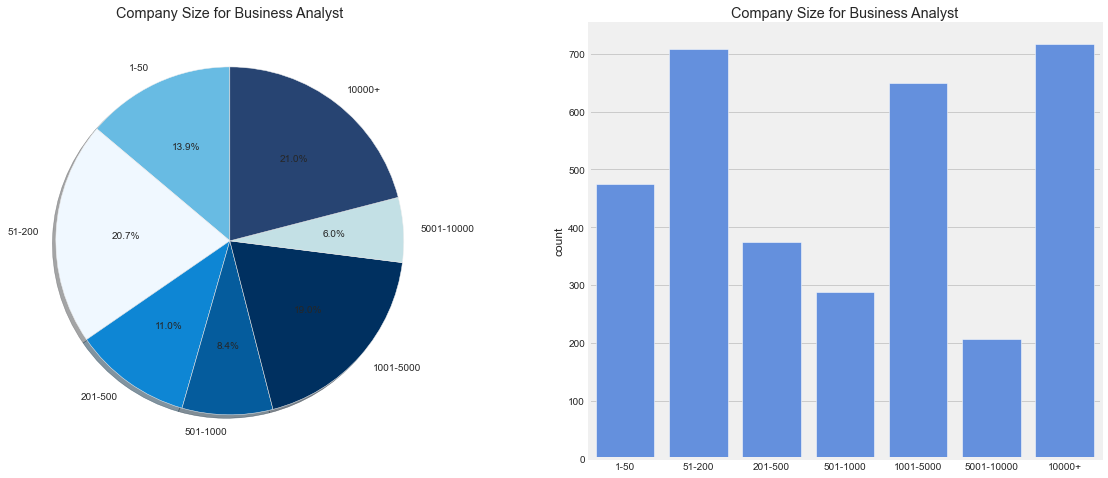

In [433]:
business_analyst = business_analyst.loc[(business_analyst['Size'] != '-1')&(business_analyst['Size'] != 'Unknown')]

business_analyst.loc[business_analyst['Size'] == '1 to 50 employees',['Size']] = '1-50'
business_analyst.loc[business_analyst['Size'] == '51 to 200 employees',['Size']] = '51-200'
business_analyst.loc[business_analyst['Size'] == '201 to 500 employees',['Size']] = '201-500'
business_analyst.loc[business_analyst['Size'] == '501 to 1000 employees',['Size']] = '501-1000'
business_analyst.loc[business_analyst['Size'] == '1001 to 5000 employees',['Size']] = '1001-5000'
business_analyst.loc[business_analyst['Size'] == '5001 to 10000 employees',['Size']] = '5001-10000'
business_analyst.loc[business_analyst['Size'] == '10000+ employees',['Size']] = '10000+'

f,ax=plt.subplots(1,2,figsize=(18,8))
labels = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+']
business_analyst['Size'].value_counts().reindex(labels).plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['#68BBE3','#F0F8FF','#0E86D4','#055C9D','#003060','#C3E0E5','#274472'], startangle=90)
ax[0].set_title('Company Size for Business Analyst')
ax[0].set_ylabel('')
sns.set_style('whitegrid')

sns.countplot('Size',data=business_analyst,ax=ax[1], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
ax[1].set_title('Company Size for Business Analyst')
ax[1].set_xlabel('')

plt.show()


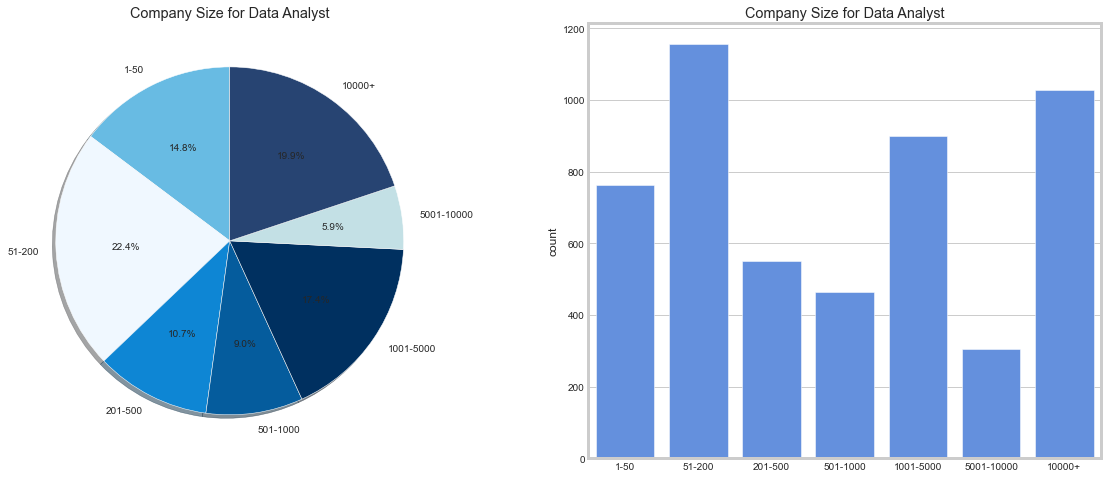

In [434]:
data_analyst = data_analyst.loc[(data_analyst['Size'] != '-1')&(data_analyst['Size'] != 'Unknown')]

data_analyst.loc[data_analyst['Size'] == '1 to 50 employees',['Size']] = '1-50'
data_analyst.loc[data_analyst['Size'] == '51 to 200 employees',['Size']] = '51-200'
data_analyst.loc[data_analyst['Size'] == '201 to 500 employees',['Size']] = '201-500'
data_analyst.loc[data_analyst['Size'] == '501 to 1000 employees',['Size']] = '501-1000'
data_analyst.loc[data_analyst['Size'] == '1001 to 5000 employees',['Size']] = '1001-5000'
data_analyst.loc[data_analyst['Size'] == '5001 to 10000 employees',['Size']] = '5001-10000'
data_analyst.loc[data_analyst['Size'] == '10000+ employees',['Size']] = '10000+'

f,ax=plt.subplots(1,2,figsize=(18,8))
labels = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+']
data_analyst['Size'].value_counts().reindex(labels).plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['#68BBE3','#F0F8FF','#0E86D4','#055C9D','#003060','#C3E0E5','#274472'], startangle=90)
ax[0].set_title('Company Size for Data Analyst')
ax[0].set_ylabel('')
sns.set_style('whitegrid')

sns.countplot('Size',data=data_analyst,ax=ax[1], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
ax[1].set_title('Company Size for Data Analyst')
ax[1].set_xlabel('')

plt.show()


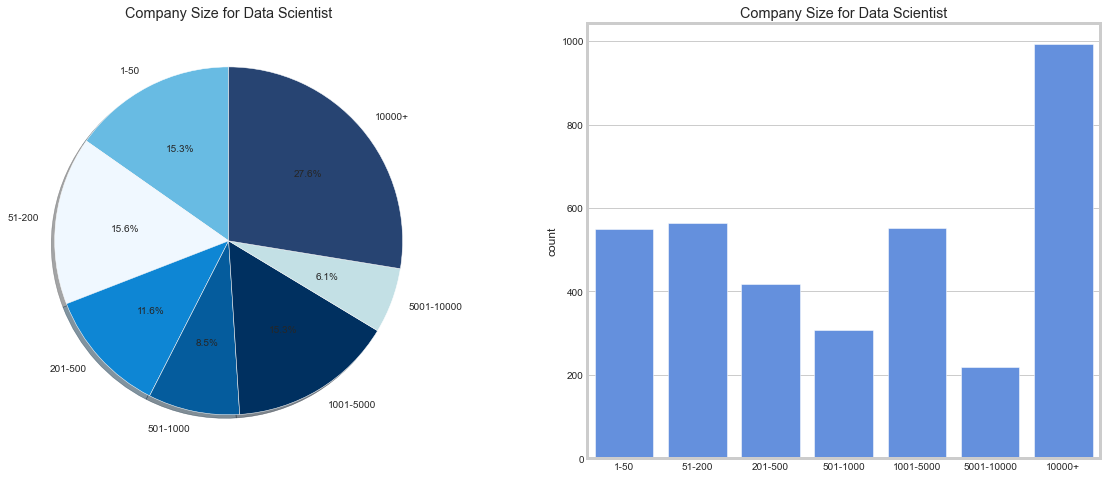

In [435]:
data_scientist = data_scientist.loc[(data_scientist['Size'] != '-1')&(data_scientist['Size'] != 'Unknown')]

data_scientist.loc[data_scientist['Size'] == '1 to 50 employees',['Size']] = '1-50'
data_scientist.loc[data_scientist['Size'] == '51 to 200 employees',['Size']] = '51-200'
data_scientist.loc[data_scientist['Size'] == '201 to 500 employees',['Size']] = '201-500'
data_scientist.loc[data_scientist['Size'] == '501 to 1000 employees',['Size']] = '501-1000'
data_scientist.loc[data_scientist['Size'] == '1001 to 5000 employees',['Size']] = '1001-5000'
data_scientist.loc[data_scientist['Size'] == '5001 to 10000 employees',['Size']] = '5001-10000'
data_scientist.loc[data_scientist['Size'] == '10000+ employees',['Size']] = '10000+'

f,ax=plt.subplots(1,2,figsize=(18,8))
labels = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+']
data_scientist['Size'].value_counts().reindex(labels).plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['#68BBE3','#F0F8FF','#0E86D4','#055C9D','#003060','#C3E0E5','#274472'], startangle=90)
ax[0].set_title('Company Size for Data Scientist')
ax[0].set_ylabel('')
sns.set_style('whitegrid')

sns.countplot('Size',data=data_scientist,ax=ax[1], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
ax[1].set_title('Company Size for Data Scientist')
ax[1].set_xlabel('')

plt.show()


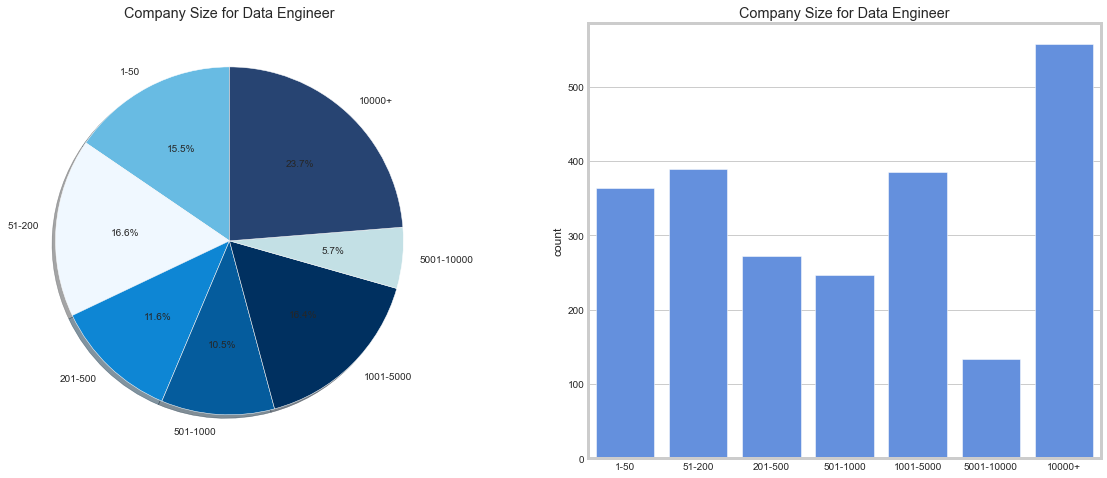

In [436]:
data_engineer = data_engineer.loc[(data_engineer['Size'] != '-1')&(data_engineer['Size'] != 'Unknown')]

data_engineer.loc[data_engineer['Size'] == '1 to 50 employees',['Size']] = '1-50'
data_engineer.loc[data_engineer['Size'] == '51 to 200 employees',['Size']] = '51-200'
data_engineer.loc[data_engineer['Size'] == '201 to 500 employees',['Size']] = '201-500'
data_engineer.loc[data_engineer['Size'] == '501 to 1000 employees',['Size']] = '501-1000'
data_engineer.loc[data_engineer['Size'] == '1001 to 5000 employees',['Size']] = '1001-5000'
data_engineer.loc[data_engineer['Size'] == '5001 to 10000 employees',['Size']] = '5001-10000'
data_engineer.loc[data_engineer['Size'] == '10000+ employees',['Size']] = '10000+'

f,ax=plt.subplots(1,2,figsize=(18,8))
labels = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+']
data_engineer['Size'].value_counts().reindex(labels).plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['#68BBE3','#F0F8FF','#0E86D4','#055C9D','#003060','#C3E0E5','#274472'], startangle=90)
ax[0].set_title('Company Size for Data Engineer')
ax[0].set_ylabel('')
sns.set_style('whitegrid')

sns.countplot('Size',data=data_engineer,ax=ax[1], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
ax[1].set_title('Company Size for Data Engineer')
ax[1].set_xlabel('')

plt.show()


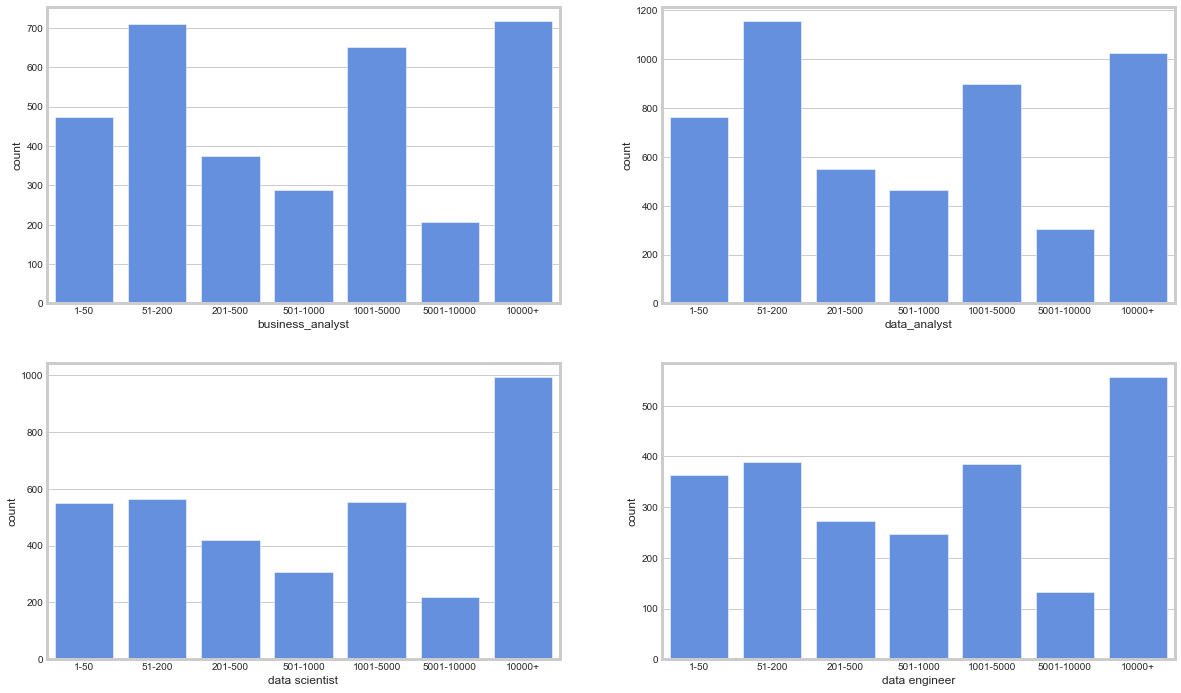

In [437]:
f,ax=plt.subplots(2,2,figsize=(18,12))
sns.countplot('Size',data=business_analyst,ax=ax[0,0], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
sns.countplot('Size',data=data_analyst,ax=ax[0,1], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
sns.countplot('Size',data=data_scientist,ax=ax[1,0], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
sns.countplot('Size',data=data_engineer,ax=ax[1,1], order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
ax[0,0].set_xlabel('business_analyst')
ax[0,1].set_xlabel('data_analyst')
ax[1,0].set_xlabel('data scientist')
ax[1,1].set_xlabel('data engineer')
plt.show()

From these plots, I found that big companies need all kinds of data related positions. On the other hand, data analyst and business analyst are wanted by small and median size companies too.

### Distribution of jobs in different industries

Text(0.5, 0, 'business analyst job count')

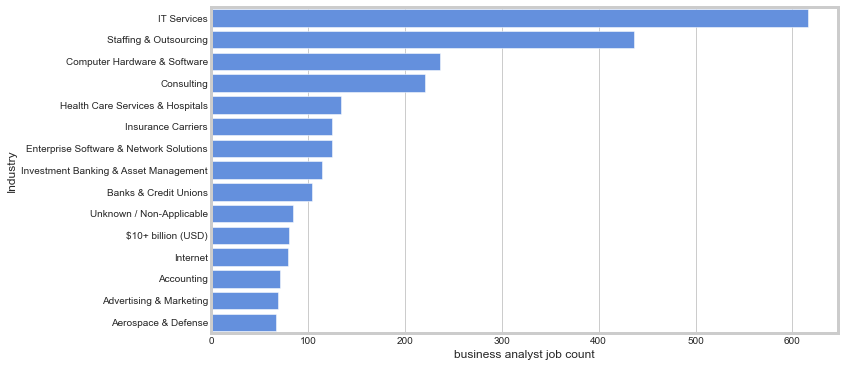

In [438]:
most_industry = business_analyst.groupby(['Industry'])['Job Title'].count()  
most_industry = most_industry.reset_index(name='Job Title')
most_industry = most_industry.sort_values(['Job Title'],ascending=False)
most_industry = most_industry[(most_industry.Industry != '-1')]
most_industry = most_industry.head(15)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(y = 'Industry', x = 'Job Title', data=most_industry,palette=['#508AF1'])  
ax.set_xlabel('business analyst job count')

Text(0.5, 0, 'data analyst job count')

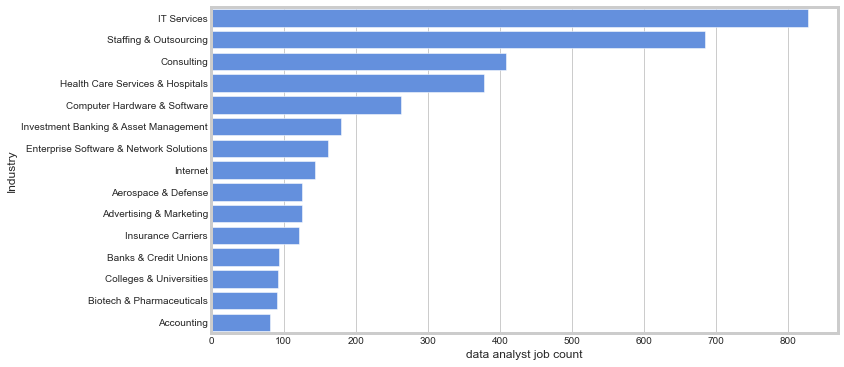

In [439]:
most_industry = data_analyst.groupby(['Industry'])['Job Title'].count()  
most_industry = most_industry.reset_index(name='Job Title')
most_industry = most_industry.sort_values(['Job Title'],ascending=False)
most_industry = most_industry[(most_industry.Industry != '-1')]
most_industry = most_industry.head(15)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(y = 'Industry', x = 'Job Title', data=most_industry,palette=['#508AF1'])  
ax.set_xlabel('data analyst job count')


Text(0.5, 0, 'data scientist job count')

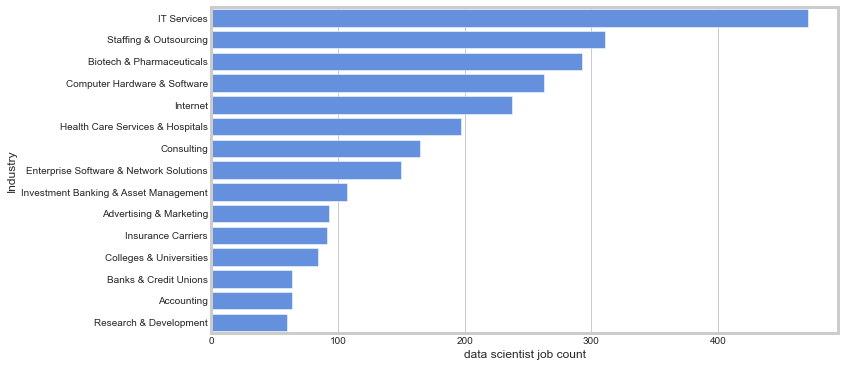

In [440]:
most_industry = data_scientist.groupby(['Industry'])['Job Title'].count()  
most_industry = most_industry.reset_index(name='Job Title')
most_industry = most_industry.sort_values(['Job Title'],ascending=False)
most_industry = most_industry[(most_industry.Industry != '-1')]
most_industry = most_industry.head(15)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(y = 'Industry', x = 'Job Title', data=most_industry,palette=['#508AF1'])  
ax.set_xlabel('data scientist job count')


Text(0.5, 0, 'data engineer job count')

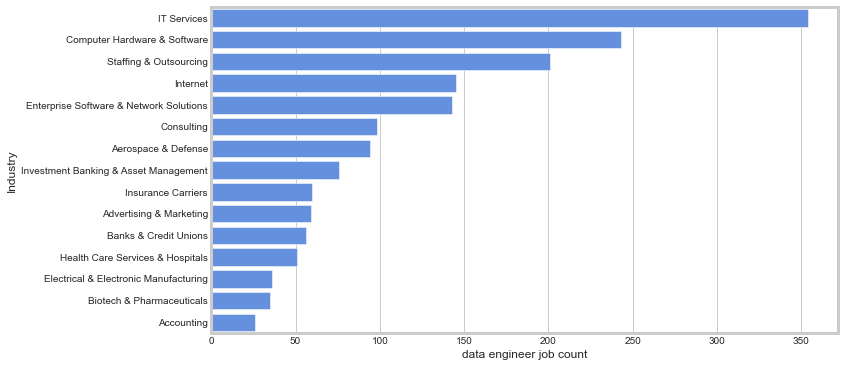

In [441]:
most_industry = data_engineer.groupby(['Industry'])['Job Title'].count()  
most_industry = most_industry.reset_index(name='Job Title')
most_industry = most_industry.sort_values(['Job Title'],ascending=False)
most_industry = most_industry[(most_industry.Industry != '-1')]
most_industry = most_industry.head(15)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(y = 'Industry', x = 'Job Title', data=most_industry,palette=['#508AF1'])  
ax.set_xlabel('data engineer job count')

### Salary level for data-related jobs

In [442]:
business_analyst = business_analyst[business_analyst['Salary Estimate'].str.len() > 10]

for index in business_analyst.index:
    temp = re.findall(r'\d+',business_analyst['Salary Estimate'][index])
    res = list(map(int, temp))
    r = res[1]
    q = res[0]
    d = (r+q)/2
    business_analyst.loc[index, 'avg_salary'] = d
    business_analyst.loc[index, 'h_salary'] = r
    business_analyst.loc[index, 'l_salary'] = q
    
business_analyst.loc[business_analyst['avg_salary'] <= 20, ['Business Analyst Salary']] = '0-20K'
business_analyst.loc[(business_analyst['avg_salary'] <= 40) & (business_analyst['avg_salary'] > 20), ['Business Analyst Salary']] = '20-40K'
business_analyst.loc[(business_analyst['avg_salary'] <= 60) & (business_analyst['avg_salary'] > 40), ['Business Analyst Salary']] = '40-60K'
business_analyst.loc[(business_analyst['avg_salary'] <= 80) & (business_analyst['avg_salary'] > 60), ['Business Analyst Salary']] = '60-80K'
business_analyst.loc[(business_analyst['avg_salary'] <= 100) & (business_analyst['avg_salary'] > 80), ['Business Analyst Salary']] = '80-100K'
business_analyst.loc[(business_analyst['avg_salary'] <= 120) & (business_analyst['avg_salary'] > 100), ['Business Analyst Salary']] = '100-120K'
business_analyst.loc[(business_analyst['avg_salary'] <= 140) & (business_analyst['avg_salary'] > 120), ['Business Analyst Salary']] = '120-140K'
business_analyst.loc[(business_analyst['avg_salary'] <= 160) & (business_analyst['avg_salary'] > 140), ['Business Analyst Salary']] = '140-160K'
business_analyst.loc[(business_analyst['avg_salary'] <= 180) & (business_analyst['avg_salary'] > 160), ['Business Analyst Salary']] = '160-180K'
business_analyst.loc[(business_analyst['avg_salary'] <= 200) & (business_analyst['avg_salary'] > 180), ['Business Analyst Salary']] = '180-200K'
business_analyst.loc[(business_analyst['avg_salary'] <= 200) & (business_analyst['avg_salary'] > 180), ['Business Analyst Salary']] = '200-220K'


In [443]:
data_analyst = data_analyst[data_analyst['Salary Estimate'].str.len() > 10]

for index in data_analyst.index:
    temp = re.findall(r'\d+',data_analyst['Salary Estimate'][index])
    res = list(map(int, temp))
    r = res[1]
    q = res[0]
    d = (r+q)/2
    data_analyst.loc[index, 'avg_salary'] = d
    data_analyst.loc[index, 'h_salary'] = r
    data_analyst.loc[index, 'l_salary'] = q
    
data_analyst.loc[data_analyst['avg_salary'] <= 20, ['Data Analyst Salary']] = '0-20K'
data_analyst.loc[(data_analyst['avg_salary'] <= 40) & (data_analyst['avg_salary'] > 20), ['Data Analyst Salary']] = '20-40K'
data_analyst.loc[(data_analyst['avg_salary'] <= 60) & (data_analyst['avg_salary'] > 40), ['Data Analyst Salary']] = '40-60K'
data_analyst.loc[(data_analyst['avg_salary'] <= 80) & (data_analyst['avg_salary'] > 60), ['Data Analyst Salary']] = '60-80K'
data_analyst.loc[(data_analyst['avg_salary'] <= 100) & (data_analyst['avg_salary'] > 80), ['Data Analyst Salary']] = '80-100K'
data_analyst.loc[(data_analyst['avg_salary'] <= 120) & (data_analyst['avg_salary'] > 100), ['Data Analyst Salary']] = '100-120K'
data_analyst.loc[(data_analyst['avg_salary'] <= 140) & (data_analyst['avg_salary'] > 120), ['Data Analyst Salary']] = '120-140K'
data_analyst.loc[(data_analyst['avg_salary'] <= 160) & (data_analyst['avg_salary'] > 140), ['Data Analyst Salary']] = '140-160K'
data_analyst.loc[(data_analyst['avg_salary'] <= 180) & (data_analyst['avg_salary'] > 160), ['Data Analyst Salary']] = '160-180K'
data_analyst.loc[(data_analyst['avg_salary'] <= 200) & (data_analyst['avg_salary'] > 180), ['Data Analyst Salary']] = '180-200K'

In [444]:
data_scientist = data_scientist[data_scientist['Salary Estimate'].str.len() > 10]

for index in data_scientist.index:
    temp = re.findall(r'\d+',data_scientist['Salary Estimate'][index])
    res = list(map(int, temp))
    r = res[1]
    q = res[0]
    d = (r+q)/2
    data_scientist.loc[index, 'avg_salary'] = d
    data_scientist.loc[index, 'h_salary'] = r
    data_scientist.loc[index, 'l_salary'] = q
    
data_scientist.loc[data_scientist['avg_salary'] <= 20, ['Data Scientist Salary']] = '0-20K'
data_scientist.loc[(data_scientist['avg_salary'] <= 40) & (data_scientist['avg_salary'] > 20), ['Data Scientist Salary']] = '20-40K'
data_scientist.loc[(data_scientist['avg_salary'] <= 60) & (data_scientist['avg_salary'] > 40), ['Data Scientist Salary']] = '40-60K'
data_scientist.loc[(data_scientist['avg_salary'] <= 80) & (data_scientist['avg_salary'] > 60), ['Data Scientist Salary']] = '60-80K'
data_scientist.loc[(data_scientist['avg_salary'] <= 100) & (data_scientist['avg_salary'] > 80), ['Data Scientist Salary']] = '80-100K'
data_scientist.loc[(data_scientist['avg_salary'] <= 120) & (data_scientist['avg_salary'] > 100), ['Data Scientist Salary']] = '100-120K'
data_scientist.loc[(data_scientist['avg_salary'] <= 140) & (data_scientist['avg_salary'] > 120), ['Data Scientist Salary']] = '120-140K'
data_scientist.loc[(data_scientist['avg_salary'] <= 160) & (data_scientist['avg_salary'] > 140), ['Data Scientist Salary']] = '140-160K'
data_scientist.loc[(data_scientist['avg_salary'] <= 180) & (data_scientist['avg_salary'] > 160), ['Data Scientist Salary']] = '160-180K'
data_scientist.loc[(data_scientist['avg_salary'] <= 200) & (data_scientist['avg_salary'] > 180), ['Data Scientist Salary']] = '180-200K'
data_scientist.loc[(data_scientist['avg_salary'] <= 220) & (data_scientist['avg_salary'] > 200), ['Data Scientist Salary']] = '200-220K'


In [445]:
data_engineer = data_engineer[data_engineer['Salary Estimate'].str.len() > 10]

for index in data_engineer.index:
    temp = re.findall(r'\d+',data_engineer['Salary Estimate'][index])
    res = list(map(int, temp))
    r = res[1]
    q = res[0]
    d = (r+q)/2
    data_engineer.loc[index, 'avg_salary'] = d
    data_engineer.loc[index, 'h_salary'] = r
    data_engineer.loc[index, 'l_salary'] = q
    
data_engineer.loc[data_engineer['avg_salary'] <= 20, ['Data Engineer Salary']] = '0-20K'
data_engineer.loc[(data_engineer['avg_salary'] <= 40) & (data_engineer['avg_salary'] > 20), ['Data Engineer Salary']] = '20-40K'
data_engineer.loc[(data_engineer['avg_salary'] <= 60) & (data_engineer['avg_salary'] > 40), ['Data Engineer Salary']] = '40-60K'
data_engineer.loc[(data_engineer['avg_salary'] <= 80) & (data_engineer['avg_salary'] > 60), ['Data Engineer Salary']] = '60-80K'
data_engineer.loc[(data_engineer['avg_salary'] <= 100) & (data_engineer['avg_salary'] > 80), ['Data Engineer Salary']] = '80-100K'
data_engineer.loc[(data_engineer['avg_salary'] <= 120) & (data_engineer['avg_salary'] > 100), ['Data Engineer Salary']] = '100-120K'
data_engineer.loc[(data_engineer['avg_salary'] <= 140) & (data_engineer['avg_salary'] > 120), ['Data Engineer Salary']] = '120-140K'
data_engineer.loc[(data_engineer['avg_salary'] <= 160) & (data_engineer['avg_salary'] > 140), ['Data Engineer Salary']] = '140-160K'
data_engineer.loc[(data_engineer['avg_salary'] <= 180) & (data_engineer['avg_salary'] > 160), ['Data Engineer Salary']] = '160-180K'
data_engineer.loc[(data_engineer['avg_salary'] <= 200) & (data_engineer['avg_salary'] > 180), ['Data Engineer Salary']] = '180-200K'
data_engineer.loc[(data_engineer['avg_salary'] <= 220) & (data_engineer['avg_salary'] > 200), ['Data Engineer Salary']] = '200-220K'

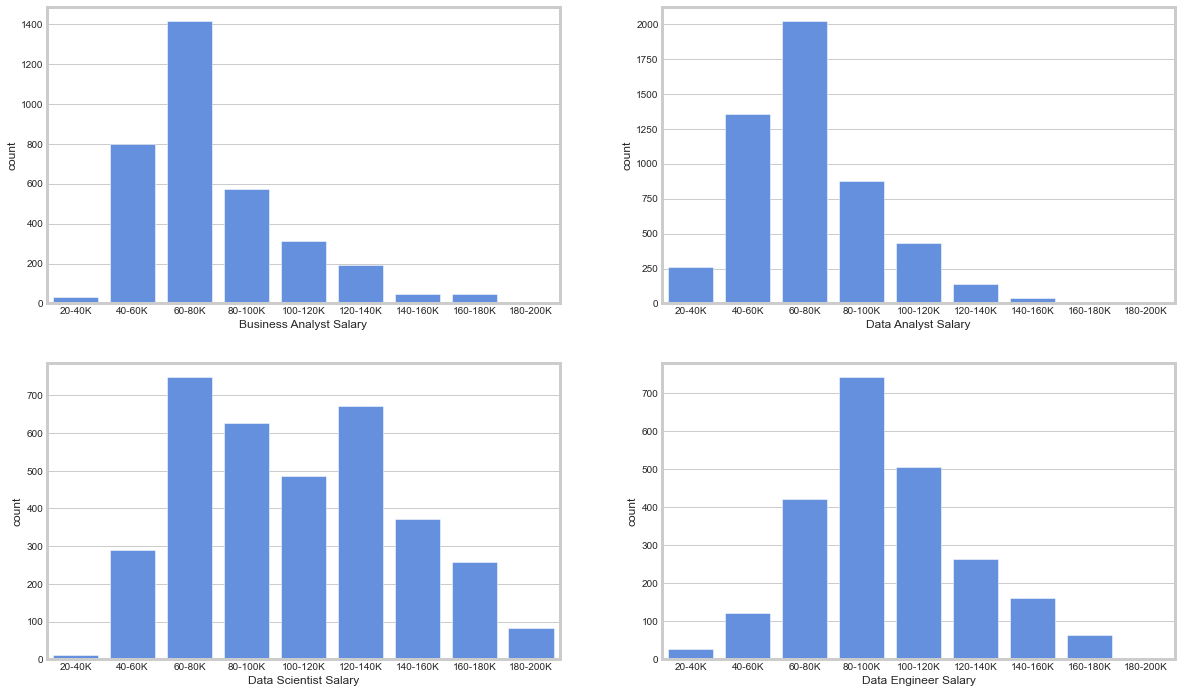

In [446]:
f,ax=plt.subplots(2,2,figsize=(18,12))
sns.countplot(x='Business Analyst Salary', data=business_analyst,ax=ax[0,0],order = ['20-40K','40-60K','60-80K','80-100K','100-120K','120-140K','140-160K','160-180K','180-200K'],palette=['#508AF1'])
sns.countplot(x='Data Analyst Salary', data=data_analyst,ax=ax[0,1],order = ['20-40K','40-60K','60-80K','80-100K','100-120K','120-140K','140-160K','160-180K','180-200K'],palette=['#508AF1'])
sns.countplot(x='Data Scientist Salary', data=data_scientist,ax=ax[1,0],order = ['20-40K','40-60K','60-80K','80-100K','100-120K','120-140K','140-160K','160-180K','180-200K'],palette=['#508AF1'])
sns.countplot(x='Data Engineer Salary', data=data_engineer,ax=ax[1,1],order = ['20-40K','40-60K','60-80K','80-100K','100-120K','120-140K','140-160K','160-180K','180-200K'],palette=['#508AF1'])

plt.show()

Data scientists and data engineers have the same salary level, while data analyst and business analyst have the same salary level.

### Various features influence salary level

#### How does company size influence salary level?

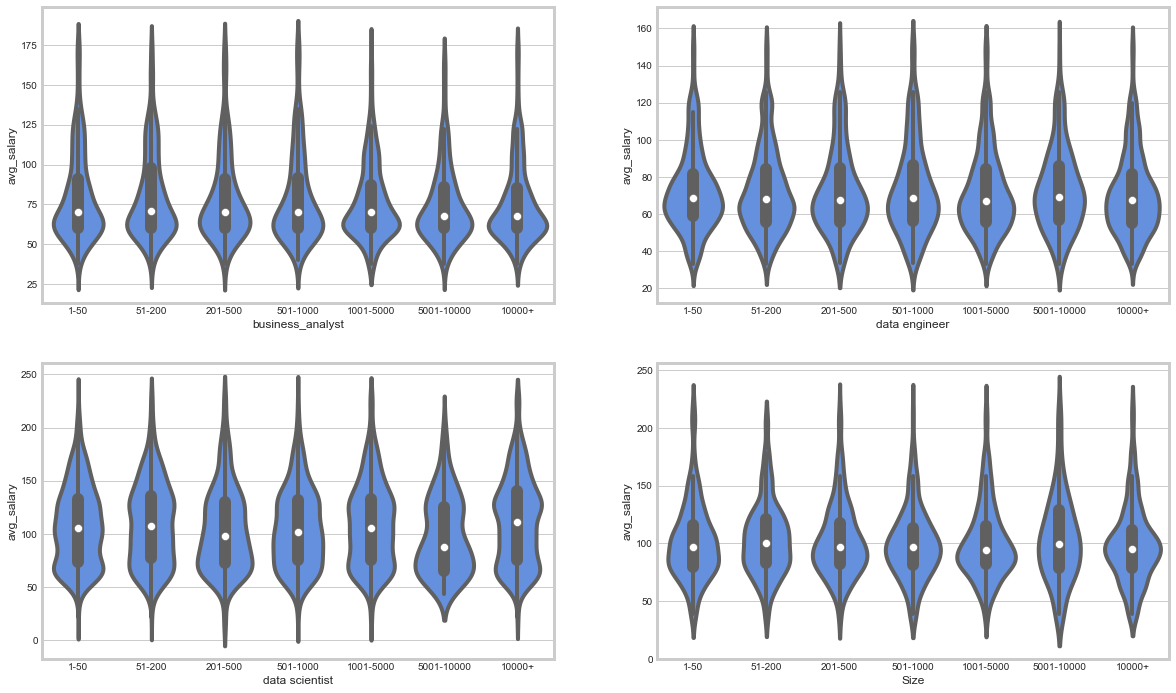

In [447]:

f,ax=plt.subplots(2,2,figsize=(18,12))
sns.violinplot("Size","avg_salary", data=business_analyst,split=True,ax=ax[0,0],order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
sns.violinplot("Size","avg_salary", data=data_analyst,split=True,ax=ax[0,1],order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
sns.violinplot("Size","avg_salary", data=data_scientist,split=True, ax=ax[1,0],order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
sns.violinplot("Size","avg_salary", data=data_engineer,split=True,ax=ax[1,1] ,order = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','10000+'],palette=['#508AF1'])
ax[0,0].set_xlabel('business_analyst')
ax[0,1].set_xlabel('data_analyst')
ax[1,0].set_xlabel('data scientist')
ax[0,1].set_xlabel('data engineer')
plt.show()

#### How does sector influence salary level?

Text(0.5, 1.0, 'business_analyst')

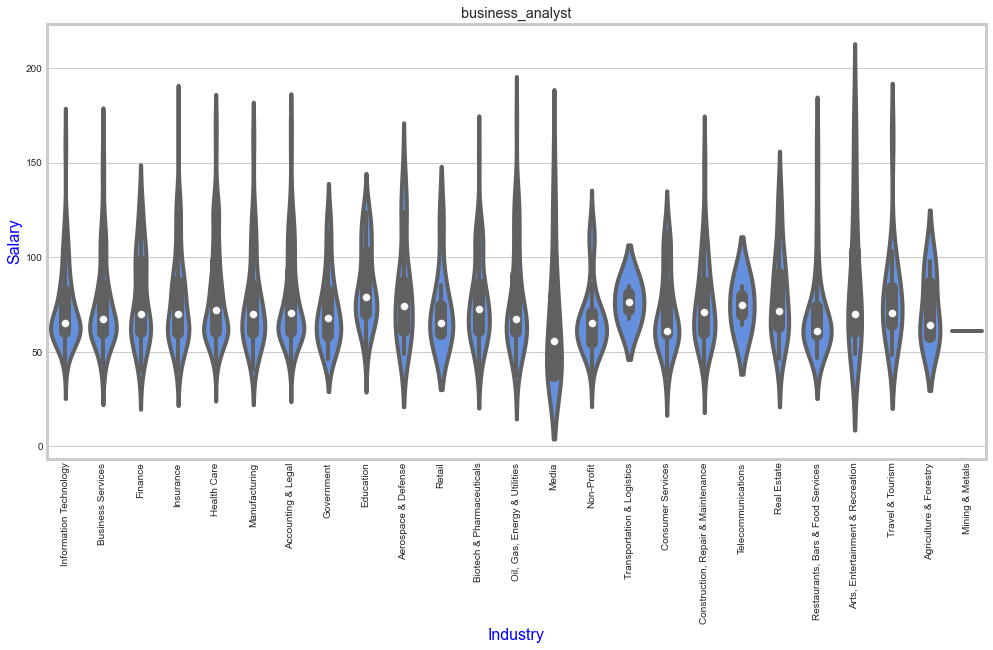

In [448]:
business_analyst = business_analyst.loc[(business_analyst['avg_salary'] > 0)]
business_analyst = business_analyst[(business_analyst.Sector != '-1')]

a = business_analyst['Sector'].value_counts()
b = a.index.tolist()


fig, ax = plt.subplots(figsize = (15,8))
ax=sns.violinplot("Sector","avg_salary", data=business_analyst,palette=['#508AF1'])
ax.set_xticklabels(b,rotation=90)  
ax.set_xlabel('Industry',fontsize=16, color='b')
ax.set_ylabel('Salary',fontsize=16,color='b')
ax.set_title('business_analyst')

Considering salary, education, retail, transportation and telecommunication are good sectors for business analyst jobs.

Text(0.5, 1.0, 'data_analyst')

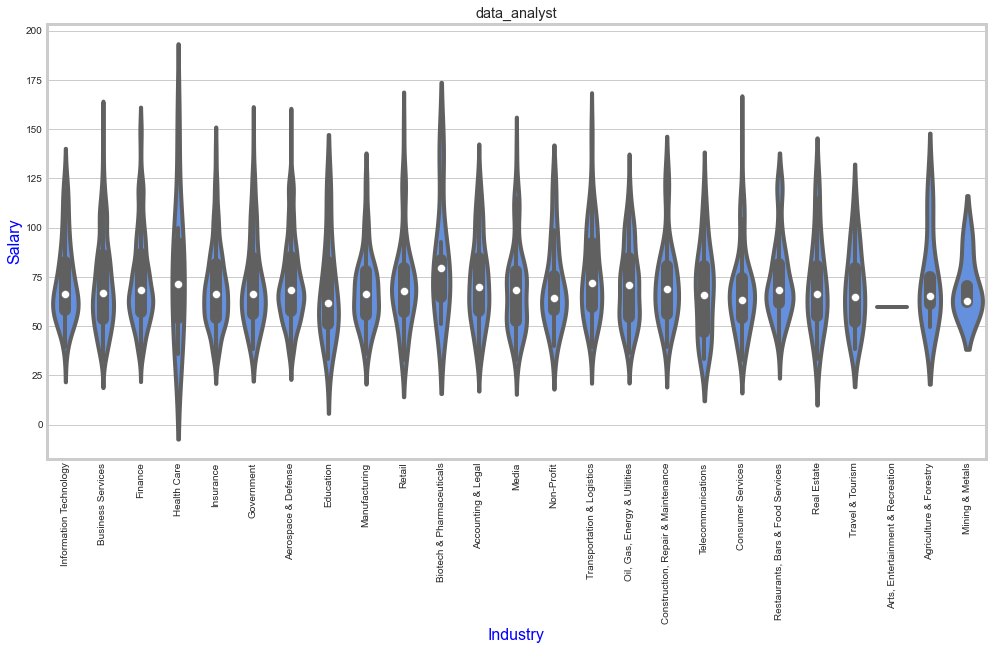

In [449]:
data_analyst = data_analyst.loc[(data_analyst['avg_salary'] > 0)]
data_analyst = data_analyst[(data_analyst.Sector != '-1')]

a = data_analyst['Sector'].value_counts()
b = a.index.tolist()


fig, ax = plt.subplots(figsize = (15,8))
ax=sns.violinplot("Sector","avg_salary", data=data_analyst,palette=['#508AF1'])
ax.set_xticklabels(b,rotation=90)  
ax.set_xlabel('Industry',fontsize=16, color='b')
ax.set_ylabel('Salary',fontsize=16,color='b') 
ax.set_title('data_analyst')

Text(0.5, 1.0, 'data_scientist')

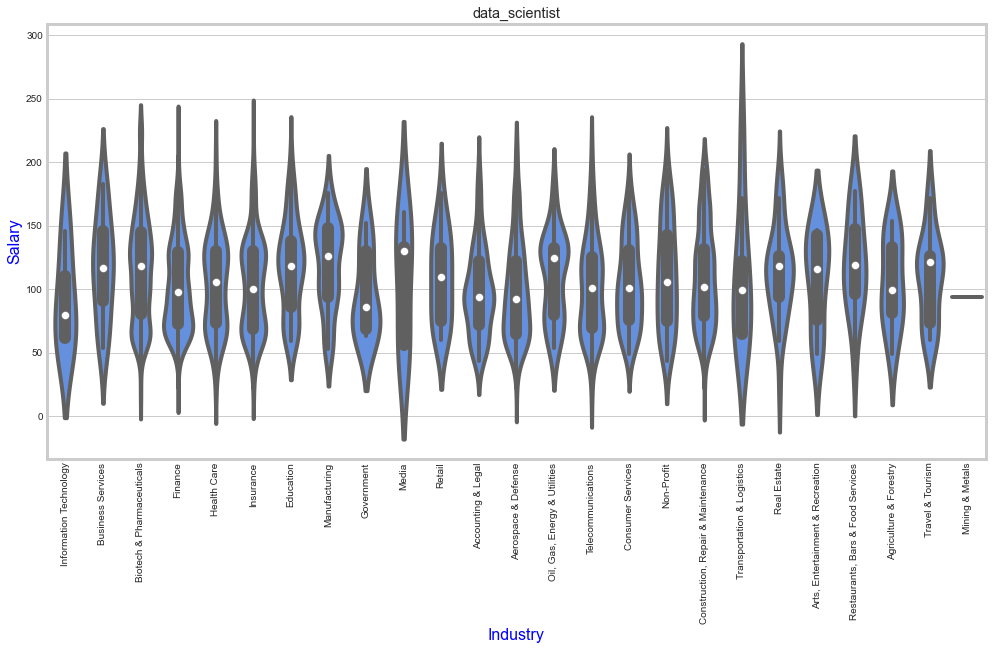

In [450]:
data_scientist = data_scientist.loc[(data_scientist['avg_salary'] > 0)]
data_scientist = data_scientist[(data_scientist.Sector != '-1')]

a = data_scientist['Sector'].value_counts()
b = a.index.tolist()


fig, ax = plt.subplots(figsize = (15,8))
ax=sns.violinplot("Sector","avg_salary", data=data_scientist,palette=['#508AF1'])
ax.set_xticklabels(b,rotation=90)  
ax.set_xlabel('Industry',fontsize=16, color='b')
ax.set_ylabel('Salary',fontsize=16,color='b')
ax.set_title('data_scientist')

Text(0.5, 1.0, 'Data Engineer')

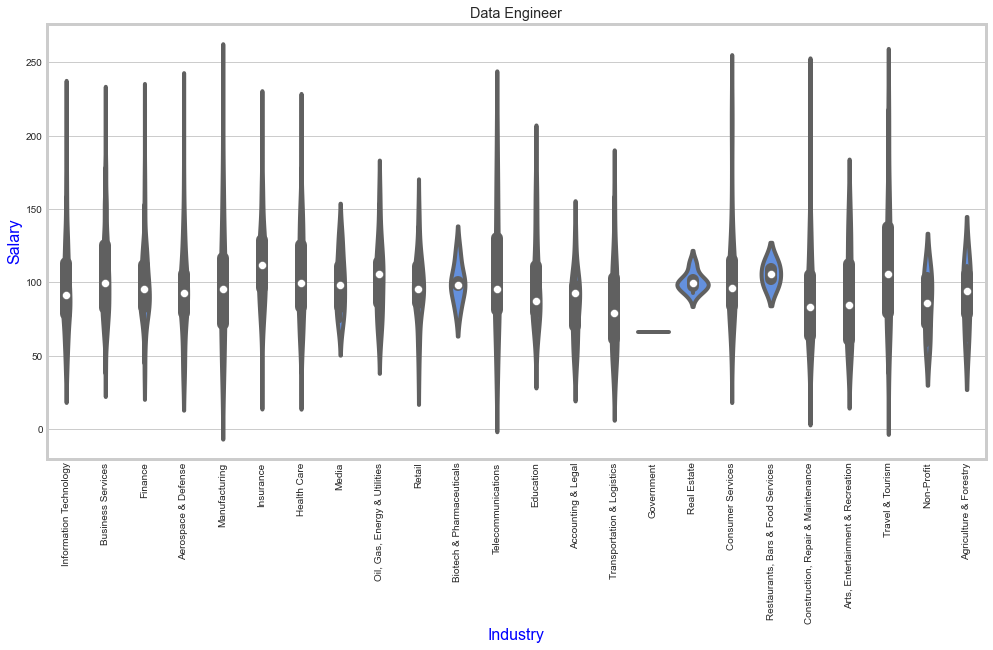

In [451]:
data_engineer = data_engineer.loc[(data_engineer['avg_salary'] > 0)]
data_engineer = data_engineer[(data_engineer.Sector != '-1')]

a = data_engineer['Sector'].value_counts()
b = a.index.tolist()


fig, ax = plt.subplots(figsize = (15,8))
ax=sns.violinplot("Sector","avg_salary", data=data_engineer,palette=['#508AF1'])
ax.set_xticklabels(b,rotation=90)  
ax.set_xlabel('Industry',fontsize=16, color='b')
ax.set_ylabel('Salary',fontsize=16,color='b')
ax.set_title('Data Engineer')

For data engineer, insurance is the sector with the highest average salary.

# Skillset for different data jobs

### For business analyst:

In [452]:
job_description = business_analyst['Job Description'].str.lower()
job_description = job_description.apply(lambda x: x.replace("\n", " "))
job_description1 = job_description.apply(lambda x: x.split())

In [453]:
count_python = 0
count_r = 0
count_sql = 0
count_excel = 0
count_java = 0
count_hadoop = 0
count_js = 0
count_cshap = 0
count_c = 0
count_cplus = 0
count_matlab = 0
count_tableau = 0
count_powerbi = 0
count_nosql = 0
count_aws = 0

for i in job_description1:
    if 'python' in i:
        count_python += 1
    if 'r' in i:
        count_r +=  1
    if 'sql' in i:
        count_sql +=  1
    if 'excel' in i:
        count_excel +=  1
    if 'java' in i:
        count_java +=  1
    if 'hadoop' in i:
        count_hadoop +=  1
    if 'Javascript' in i:
        count_js += 1
    if 'c#' in i:
        count_cshap += 1
    if 'c' in i:
        count_c += 1
    if 'c++' in i:
        count_cplus += 1
    if 'matlab' in i:
        count_matlab += 1
    if 'tableau' in i:
        count_tableau += 1
    if 'powerbi' in i:
        count_powerbi += 1
    if 'nosql' in i:
        count_nosql += 1
    if 'aws' in i:
        count_aws += 1

In [454]:
# initialize list of lists
data = [['python', count_python], ['r', count_r ], ['sql', count_sql], ['excel',count_excel],['java',count_java],
       ['hadoop', count_hadoop],['Javascript', count_js],['c#', count_cshap],['c++', count_cplus],
       ['matlab', count_matlab],['tableau', count_tableau],['powerbi', count_powerbi],['nosql', count_nosql],['aws', count_aws]]

  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Skill', 'Count'])

<AxesSubplot:ylabel='Skill'>

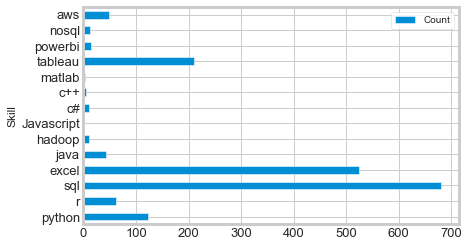

In [455]:
df.plot(x='Skill', y='Count', kind="barh",fontsize = 13)

### For data analyst:

In [456]:
job_description = data_analyst['Job Description'].str.lower()
job_description = job_description.apply(lambda x: x.replace("\n", " "))
job_description1 = job_description.apply(lambda x: x.split())

In [457]:
count_python = 0
count_r = 0
count_sql = 0
count_excel = 0
count_java = 0
count_hadoop = 0
count_js = 0
count_cshap = 0
count_c = 0
count_cplus = 0
count_matlab = 0
count_tableau = 0
count_powerbi = 0
count_nosql = 0
count_aws = 0

for i in job_description1:
    if 'python' in i:
        count_python += 1
    if 'r' in i:
        count_r +=  1
    if 'sql' in i:
        count_sql +=  1
    if 'excel' in i:
        count_excel +=  1
    if 'java' in i:
        count_java +=  1
    if 'hadoop' in i:
        count_hadoop +=  1
    if 'Javascript' in i:
        count_js += 1
    if 'c#' in i:
        count_cshap += 1
    if 'c' in i:
        count_c += 1
    if 'c++' in i:
        count_cplus += 1
    if 'matlab' in i:
        count_matlab += 1
    if 'tableau' in i:
        count_tableau += 1
    if 'powerbi' in i:
        count_powerbi += 1
    if 'nosql' in i:
        count_nosql += 1
    if 'aws' in i:
        count_aws += 1

<AxesSubplot:ylabel='Skill'>

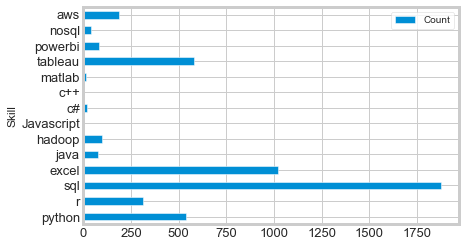

In [458]:
# initialize list of lists
data = [['python', count_python], ['r', count_r ], ['sql', count_sql], ['excel',count_excel],['java',count_java],
       ['hadoop', count_hadoop],['Javascript', count_js],['c#', count_cshap],['c++', count_cplus],
       ['matlab', count_matlab],['tableau', count_tableau],['powerbi', count_powerbi],['nosql', count_nosql],['aws', count_aws]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Skill', 'Count'])

df.plot(x='Skill', y='Count', kind="barh",fontsize = 13)

### For data scientists:

In [459]:
job_description = data_scientist['Job Description'].str.lower()
job_description = job_description.apply(lambda x: x.replace("\n", " "))
job_description1 = job_description.apply(lambda x: x.split())

In [460]:
count_python = 0
count_r = 0
count_sql = 0
count_excel = 0
count_java = 0
count_hadoop = 0
count_js = 0
count_cshap = 0
count_c = 0
count_cplus = 0
count_matlab = 0
count_tableau = 0
count_powerbi = 0
count_nosql = 0
count_aws = 0

for i in job_description1:
    if 'python' in i:
        count_python += 1
    if 'r' in i:
        count_r +=  1
    if 'sql' in i:
        count_sql +=  1
    if 'excel' in i:
        count_excel +=  1
    if 'java' in i:
        count_java +=  1
    if 'hadoop' in i:
        count_hadoop +=  1
    if 'Javascript' in i:
        count_js += 1
    if 'c#' in i:
        count_cshap += 1
    if 'c' in i:
        count_c += 1
    if 'c++' in i:
        count_cplus += 1
    if 'matlab' in i:
        count_matlab += 1
    if 'tableau' in i:
        count_tableau += 1
    if 'powerbi' in i:
        count_powerbi += 1
    if 'nosql' in i:
        count_nosql += 1
    if 'aws' in i:
        count_aws += 1

<AxesSubplot:ylabel='Skill'>

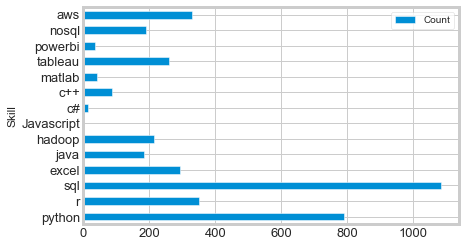

In [461]:
# initialize list of lists
data = [['python', count_python], ['r', count_r ], ['sql', count_sql], ['excel',count_excel],['java',count_java],
       ['hadoop', count_hadoop],['Javascript', count_js],['c#', count_cshap],['c++', count_cplus],
       ['matlab', count_matlab],['tableau', count_tableau],['powerbi', count_powerbi],['nosql', count_nosql],['aws', count_aws]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Skill', 'Count'])

df.plot(x='Skill', y='Count', kind="barh",fontsize = 13)


### For data engineers:

In [462]:
job_description = data_engineer['Job Description'].str.lower()
job_description = job_description.apply(lambda x: x.replace("\n", " "))
job_description1 = job_description.apply(lambda x: x.split())

In [463]:
count_python = 0
count_r = 0
count_sql = 0
count_excel = 0
count_java = 0
count_hadoop = 0
count_js = 0
count_cshap = 0
count_c = 0
count_cplus = 0
count_matlab = 0
count_tableau = 0
count_powerbi = 0
count_nosql = 0
count_aws = 0

for i in job_description1:
    if 'python' in i:
        count_python += 1
    if 'r' in i:
        count_r +=  1
    if 'sql' in i:
        count_sql +=  1
    if 'excel' in i:
        count_excel +=  1
    if 'java' in i:
        count_java +=  1
    if 'hadoop' in i:
        count_hadoop +=  1
    if 'Javascript' in i:
        count_js += 1
    if 'c#' in i:
        count_cshap += 1
    if 'c' in i:
        count_c += 1
    if 'c++' in i:
        count_cplus += 1
    if 'matlab' in i:
        count_matlab += 1
    if 'tableau' in i:
        count_tableau += 1
    if 'powerbi' in i:
        count_powerbi += 1
    if 'nosql' in i:
        count_nosql += 1
    if 'aws' in i:
        count_aws += 1

<AxesSubplot:ylabel='Skill'>

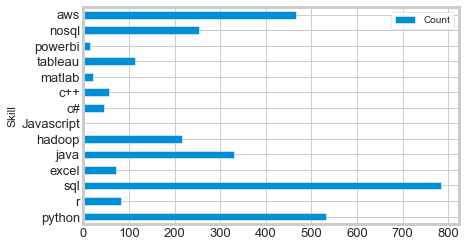

In [464]:
# initialize list of lists
data = [['python', count_python], ['r', count_r ], ['sql', count_sql], ['excel',count_excel],['java',count_java],
       ['hadoop', count_hadoop],['Javascript', count_js],['c#', count_cshap],['c++', count_cplus],
       ['matlab', count_matlab],['tableau', count_tableau],['powerbi', count_powerbi],['nosql', count_nosql],['aws', count_aws]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Skill', 'Count'])

a = df['Skill'].value_counts()
b = a.index.tolist()

df.plot(x='Skill', y='Count', kind="barh",fontsize = 13)

The 3 most necessary tools to handle for a business analyst is Sql, Excel, and Tableau.
The 3 most necessary programming languages for a data analyst is Sql, Excel, and Tableau, but Python is also a necessary skill.
The skillset required for data scientists are more dynamics, Sql, Python and R are three most important programming language needed, while other languages or tools like AWS, Tableau, Excel, JAVA and Hadoop are required by many companies as well. 
The 3 most necessary skills for a data analyst is Sql, Excel, and tableau, but Python is also a necessary skill.
For data engineers, Sql, Python, and AWS are required by most companies, other languages like JAVA, NoSql and Hadoop are also important.

# Job Distribution Map

### Business Analyst Job Map

In [276]:
df = business_analyst[['Location']]
df = df.drop_duplicates()
len(df)

#df1
#slicing: 
df1 = df.iloc[0:100]

#find latitude and longitude, put them in this "location" dataframe

#api
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Your_Name")
#apply
df1['latitude'] = df1['Location'].apply(lambda x: geolocator.geocode(x).latitude)
df1['longtitude'] = df1['Location'].apply(lambda x: geolocator.geocode(x).longitude)

#df2

df2 = df.iloc[100:150]

df2['latitude'] = df2['Location'].apply(lambda x: geolocator.geocode(x).latitude)
df2['longtitude'] = df2['Location'].apply(lambda x: geolocator.geocode(x).longitude)

#df3

df3 = df.iloc[150:200]

df3['latitude'] = df3['Location'].apply(lambda x: geolocator.geocode(x).latitude)
df3['longtitude'] = df3['Location'].apply(lambda x: geolocator.geocode(x).longitude)

In [281]:
df_lalong = pd.concat([df1,df2,df3]) 
df_lalong.to_csv('C:\\Users\\Chloe\\Desktop\\location_business_analyst.csv')

In [282]:
df_lalong = pd.read_csv('C:\\Users\\Chloe\\Desktop\\location_business_analyst.csv')
location = pd.merge(business_analyst, df_lalong, on=["Location", "Location"])

In [283]:
import folium
from folium.plugins import HeatMap

heatmap_data = [] # create an empty list
for index, location in location.iterrows():
    # For each row in our data, we append (add) a [latitude, longitude] list to the heatmap_data list
    heatmap_data.append([location['latitude'], location['longtitude']])
    
# Now we create a new map
m1 = folium.Map(location=[35.9132, -79.0558], zoom_start=4)

# Now, a heatmap
fire_heatmap = HeatMap(heatmap_data)

# We add the heat map to the map m2
fire_heatmap.add_to(m1)

# Now let's show the map
m1

### Data Analyst Job Map

In [265]:
df_lalong = pd.read_csv('C:\\Users\\Chloe\\Desktop\\location_data_analyst.csv')
location = pd.merge(data_analyst, df_lalong, on=["Location", "Location"])

In [266]:
import folium
from folium.plugins import HeatMap

heatmap_data = []
for index, location in location.iterrows():
    heatmap_data.append([location['latitude'], location['longtitude']])
    
m2 = folium.Map(location=[35.9132, -79.0558], zoom_start=4)

fire_heatmap = HeatMap(heatmap_data)

fire_heatmap.add_to(m2)

m2

### Data Scientist Job Map

In [288]:
df_lalong = pd.read_csv('C:\\Users\\Chloe\\Desktop\\location_data_analyst.csv')
location = pd.merge(data_scientist, df_lalong, on=["Location", "Location"])

heatmap_data = [] 
for index, location in location.iterrows():
  
    heatmap_data.append([location['latitude'], location['longtitude']])
   
m3 = folium.Map(location=[35.9132, -79.0558], zoom_start=4)

fire_heatmap = HeatMap(heatmap_data)
fire_heatmap.add_to(m3)

m3

### Data Engineer Job Map

In [290]:
df_lalong = pd.read_csv('C:\\Users\\Chloe\\Desktop\\location_data_analyst.csv')
location = pd.merge(data_engineer, df_lalong, on=["Location", "Location"])

heatmap_data = [] 
for index, location in location.iterrows():
  
    heatmap_data.append([location['latitude'], location['longtitude']])
   
m4 = folium.Map(location=[35.9132, -79.0558], zoom_start=4)

fire_heatmap = HeatMap(heatmap_data)
fire_heatmap.add_to(m4)

m4

Companies that hire most business analysts are located in New York, Los Angels, Texas, and Chicago.
Companies that hire most data analysts are located across the country, most of them are on east and west part of U.S. New York, Chicago, San Francisco and Los Angels are four cities that has most data analyst jobs.
Companies that hire most data scientists and data engineers are in Los Angels and Texas.

# Limitations 

There are limitations about the dataset that may influence the reliability of the report. First, the dataset was collected for a period of time in 2020. It may not reflect the situation before or after that period. Also, since I do not know the specific time period, it is hard to analyze how the political and market environment influence the job market at that time. Second, the job posting on Glassdoor could not represent the whole job market because some companies do not use Glassdoor as their job posting platform. Third, if the companies post one position for multiple times, the web crawler may scrape the data for more than one time, which make the result inaccurate. Finally, there is no time information, so I cannot explore the change of skill requirements or trend of the job market. 

# Conclusion

In this project, I did an exploratory data analysis on data-related job posting. To get an overall picture of data-related job market, I analyze companies that offer most data-related jobs, the size of the companies and the industries they are in. Then, I focus on analyzing salary, which is a main concern for most people. I not only show salary level on different data-related jobs, but also analyze how salary may vary from industry to industry. 
As the project serves to help students like me to better understand the demand of job market, I explore the skillset that are required by companies regarding data-related hiring. Finally, I drew a few maps to show the distribution of data-related job across the country.